# 📝 Project Title: Uber Fare Prediction – A Regression Approach

## 📌 Project Description:

- In this project, I explored the Uber fare dataset to predict ride fares based on ride-related features such as pickup/drop-off locations, distance, and passenger count.
The goal was to build regression models that can capture relationships between these features and provide accurate fare predictions.

## 🧱 Notebook Structure & Sections

### ✅ 1. Importing Required Libraries
- Start by importing essential libraries (pandas, numpy, seaborn, sklearn, xgboost, randomforestregressor, gradientbosstingregressor, etc.).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook" # Or "plotly_mimetype+notebook_connected"
import cartopy.crs as ccrs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

### ✅ 2. Data Preprocessing
- Handled missing values and outliers.
- Converted datetime fields into useful features (hour, day, month, etc.).
- Engineered new features such as trip distance.

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [8]:
df.drop(columns = ['Unnamed: 0', 'key'], axis = 1, inplace = True)

In [9]:
df.drop(df[df['passenger_count'] >= 200].index, inplace = True)
df.drop(df[df['passenger_count'] == 0].index, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199290 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199290 non-null  float64
 1   pickup_datetime    199290 non-null  object 
 2   pickup_longitude   199290 non-null  float64
 3   pickup_latitude    199290 non-null  float64
 4   dropoff_longitude  199290 non-null  float64
 5   dropoff_latitude   199290 non-null  float64
 6   passenger_count    199290 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [11]:
df['org_pickup_datetime'] = df['pickup_datetime']

In [12]:
# Assuming 'pickup_datetime' is in string format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'].str.replace(' UTC', ''))

In [13]:
# Extract datetime components
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_minute'] = df['pickup_datetime'].dt.minute
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday  # Monday=0, Sunday=6

In [14]:
# Hour and Weekday are cyclic features, so we'll apply sin and cos transformations.
df['hour_sin'] = np.sin(2 * np.pi * df['pickup_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['pickup_hour'] / 24)

df['weekday_sin'] = np.sin(2 * np.pi * df['pickup_weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['pickup_weekday'] / 7)

In [15]:
# Convert datetime to timestamp (seconds since Unix epoch)
df['pickup_datetime'] = df['pickup_datetime'].astype(int) / 10**9  # Convert from nanoseconds to seconds

In [16]:
df['original_fare_amount'] = df['fare_amount']

In [17]:
corr = df[['pickup_datetime', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos']].corr()
print(corr)

                 pickup_datetime  hour_sin  hour_cos  weekday_sin  weekday_cos
pickup_datetime         1.000000  0.003594  0.002349    -0.008623     0.006967
hour_sin                0.003594  1.000000 -0.171669     0.000897    -0.002946
hour_cos                0.002349 -0.171669  1.000000    -0.084426    -0.022657
weekday_sin            -0.008623  0.000897 -0.084426     1.000000     0.013931
weekday_cos             0.006967 -0.002946 -0.022657     0.013931     1.000000


In [18]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,org_pickup_datetime,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,original_fare_amount
0,7.5,1.431028e+09,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06 UTC,2015,5,7,19,52,3,-0.965926,0.258819,0.433884,-0.900969,7.5
1,7.7,1.247861e+09,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56 UTC,2009,7,17,20,4,4,-0.866025,0.500000,-0.433884,-0.900969,7.7
2,12.9,1.251150e+09,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00 UTC,2009,8,24,21,45,0,-0.707107,0.707107,0.000000,1.000000,12.9
3,5.3,1.246005e+09,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21 UTC,2009,6,26,8,22,4,0.866025,-0.500000,-0.433884,-0.900969,5.3
4,16.0,1.409248e+09,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00 UTC,2014,8,28,17,47,3,-0.965926,-0.258819,0.433884,-0.900969,16.0


In [19]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'org_pickup_datetime', 'pickup_year', 'pickup_month', 'pickup_day',
       'pickup_hour', 'pickup_minute', 'pickup_weekday', 'hour_sin',
       'hour_cos', 'weekday_sin', 'weekday_cos', 'original_fare_amount'],
      dtype='object')

In [20]:
latitude_longitude_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
numerical_columns = ['passenger_count']
minute_year_columns = ['pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute', 'pickup_weekday']
date_time = ['pickup_datetime']
time_freq_columns = ['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos']
categorical_columns = []
target = 'fare_amount'

In [21]:
org_target = 'original_fare_amount'
org_pickup_datetime = 'org_pickup_datetime'

### ✅ 3. Exploratory Data Analysis (EDA)
- Visualized feature distributions and correlations.
- Checked relationships between fare amount and predictors.
- Applied log transformation to the target variable, Winsorized outliers

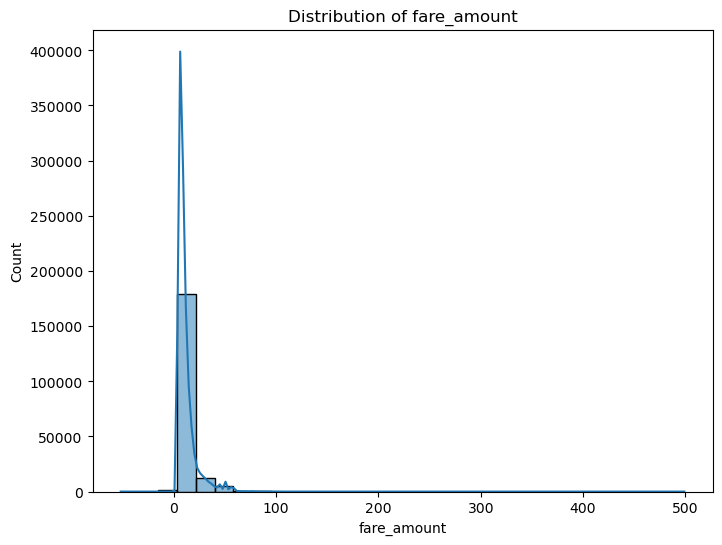

In [22]:
# Plotting histogram for distribution
plt.figure(figsize=(8, 6))
sns.histplot(df[target], kde=True, bins=30)
plt.title(f'Distribution of {target}')
plt.show()

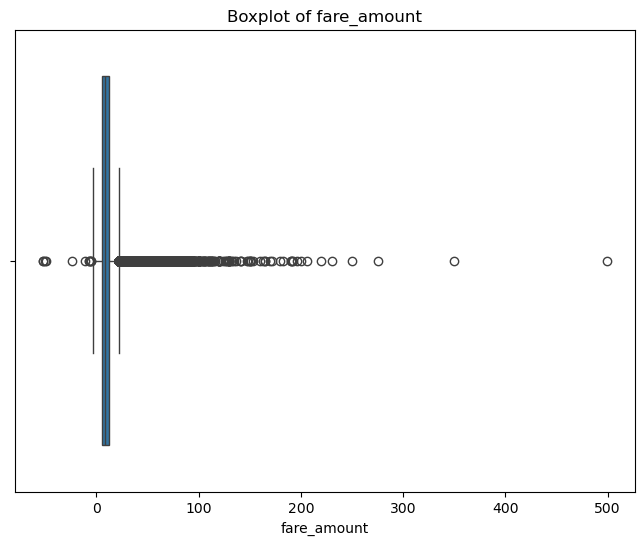

In [23]:
# Plotting boxplot to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[target])
plt.title(f'Boxplot of {target}')
plt.show()

In [24]:
# Calculate skewness
skewness = df[target].skew()
print(f'Skewness of {target}: {skewness}')

Skewness of fare_amount: 4.504736683580377


In [25]:
df[target] = np.log1p(df[target])  # log(x + 1) to handle 0 values

/opt/anaconda3/envs/spy/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



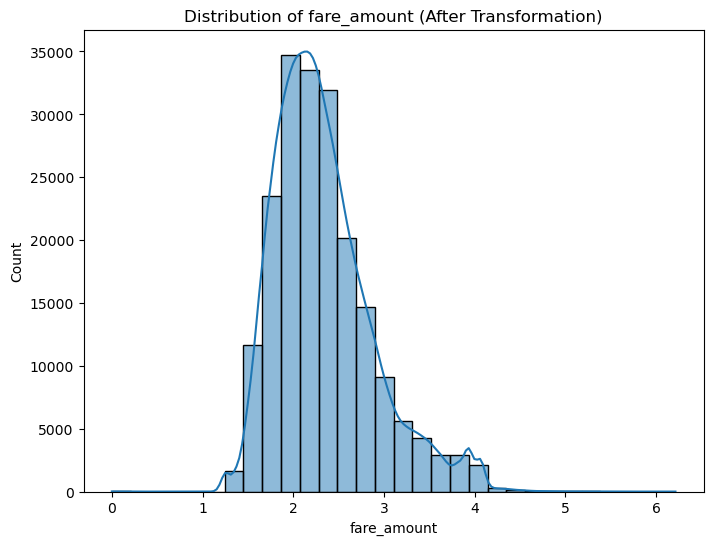

In [26]:
# Plotting histogram for distribution (After Transformation)
plt.figure(figsize=(8, 6))
sns.histplot(df[target], kde=True, bins=30)
plt.title(f'Distribution of {target} (After Transformation)')
plt.show()

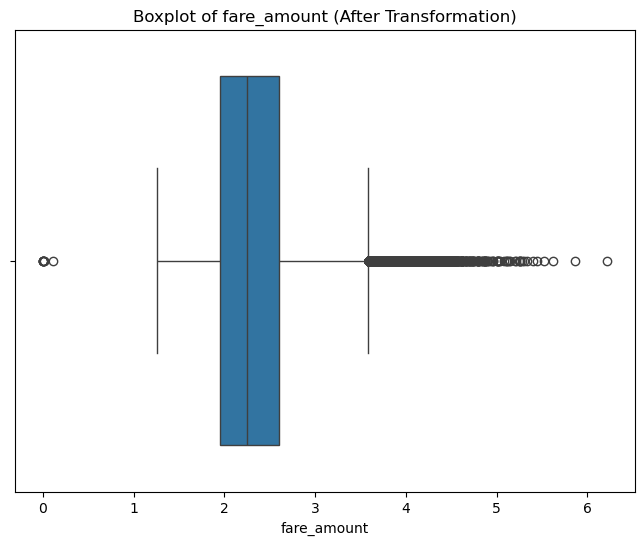

In [27]:
# Plotting boxplot to check for outliers (After Transformation)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[target])
plt.title(f'Boxplot of {target} (After Transformation)')
plt.show()

In [28]:
# Impute NaN values in the target column with the mean
df[target].fillna(df[target].mean(), inplace=True)

/var/folders/n3/1j5nrn9930j2yg8rlrdbgt6c0000gn/T/ipykernel_6439/781743526.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [29]:
# Calculate skewness after transformation
skewness = df[target].skew()
print(f'Skewness of {target}: {skewness}')

Skewness of fare_amount: 0.9863602739236554


/var/folders/n3/1j5nrn9930j2yg8rlrdbgt6c0000gn/T/ipykernel_6439/374495901.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




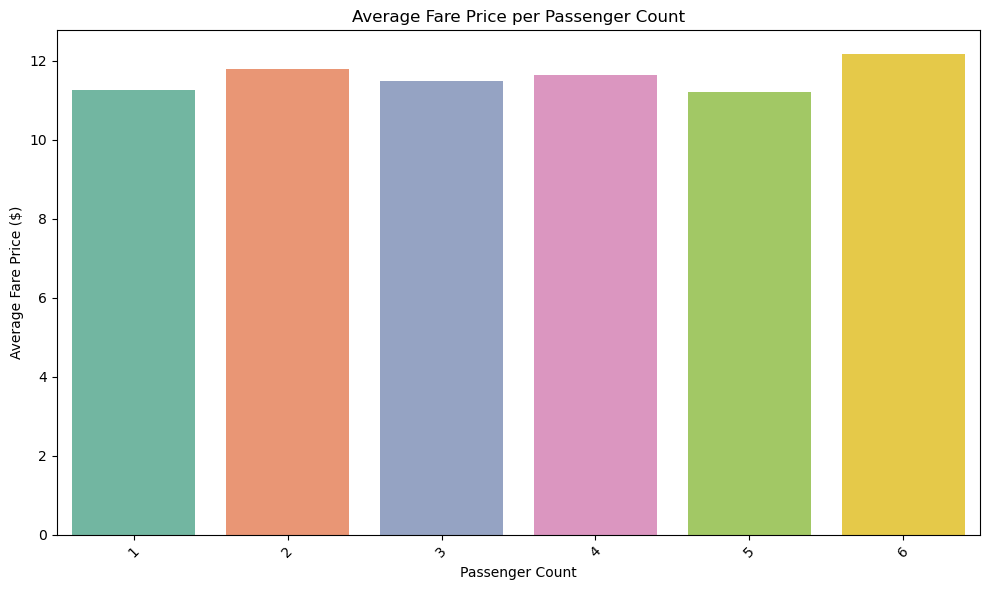

In [30]:
# Step 1: Group by 'passenger_count' and sum the 'fare_price'
fare_sum = df.groupby('passenger_count')[org_target].sum()

# Step 2: Get the count of each passenger group (how many times each passenger count appears)
passenger_count_group = df['passenger_count'].value_counts()

# Step 3: Calculate the average fare_price per passenger group
fare_avg = fare_sum / passenger_count_group

# Step 4: Plot the result as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=fare_avg.index, y=fare_avg.values, palette='Set2')

# Customize the plot
plt.title('Average Fare Price per Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df['passenger_count'].value_counts()

passenger_count
1    138425
2     29428
5     14009
3      8881
4      4276
6      4271
Name: count, dtype: int64

/var/folders/n3/1j5nrn9930j2yg8rlrdbgt6c0000gn/T/ipykernel_6439/3754200843.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




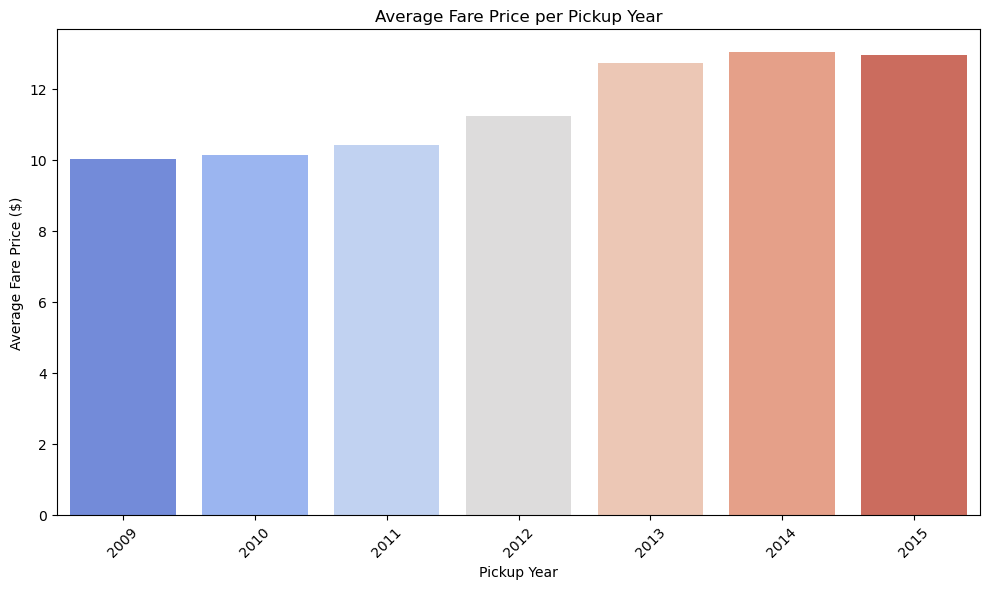

In [32]:
# Step 1: Group by 'pickup_year' and sum the 'fare_price'
fare_sum_by_year = df.groupby('pickup_year')[org_target].sum()

# Step 2: Get the count of each 'pickup_year' group (how many times each year appears)
pickup_year_group = df['pickup_year'].value_counts()

# Step 3: Calculate the average fare_price per year
fare_avg_by_year = fare_sum_by_year / pickup_year_group

# Step 4: Plot the result as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=fare_avg_by_year.index, y=fare_avg_by_year.values, palette='coolwarm')

# Customize the plot
plt.title('Average Fare Price per Pickup Year')
plt.xlabel('Pickup Year')
plt.ylabel('Average Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/n3/1j5nrn9930j2yg8rlrdbgt6c0000gn/T/ipykernel_6439/2167292527.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




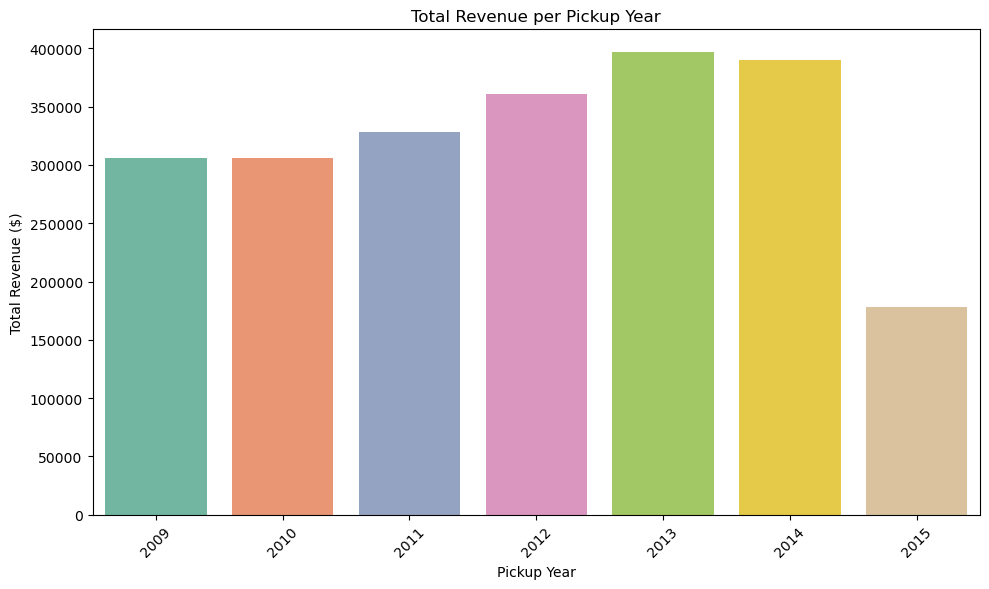

In [33]:
# Step 1: Group by 'pickup_year' and sum the 'fare_price' to get total revenue per year
revenue_by_year = df.groupby('pickup_year')[org_target].sum()

# Step 2: Plot the result as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_year.index, y=revenue_by_year.values, palette='Set2')

# Customize the plot
plt.title('Total Revenue per Pickup Year')
plt.xlabel('Pickup Year')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/n3/1j5nrn9930j2yg8rlrdbgt6c0000gn/T/ipykernel_6439/2478394458.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




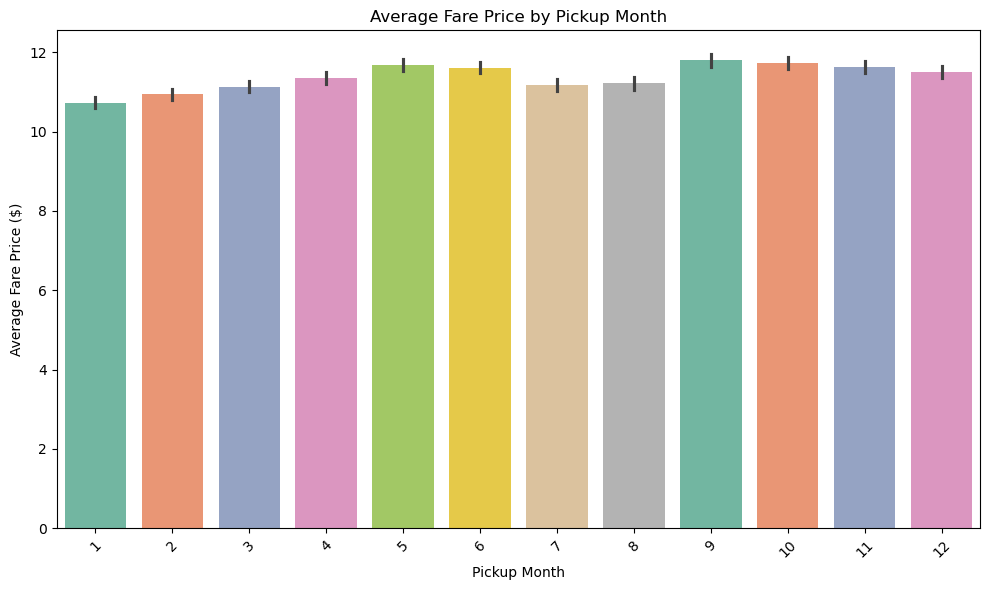

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_month', y=org_target, data=df, estimator='mean', palette='Set2')
plt.title('Average Fare Price by Pickup Month')
plt.xlabel('Pickup Month')
plt.ylabel('Average Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/n3/1j5nrn9930j2yg8rlrdbgt6c0000gn/T/ipykernel_6439/4256144481.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




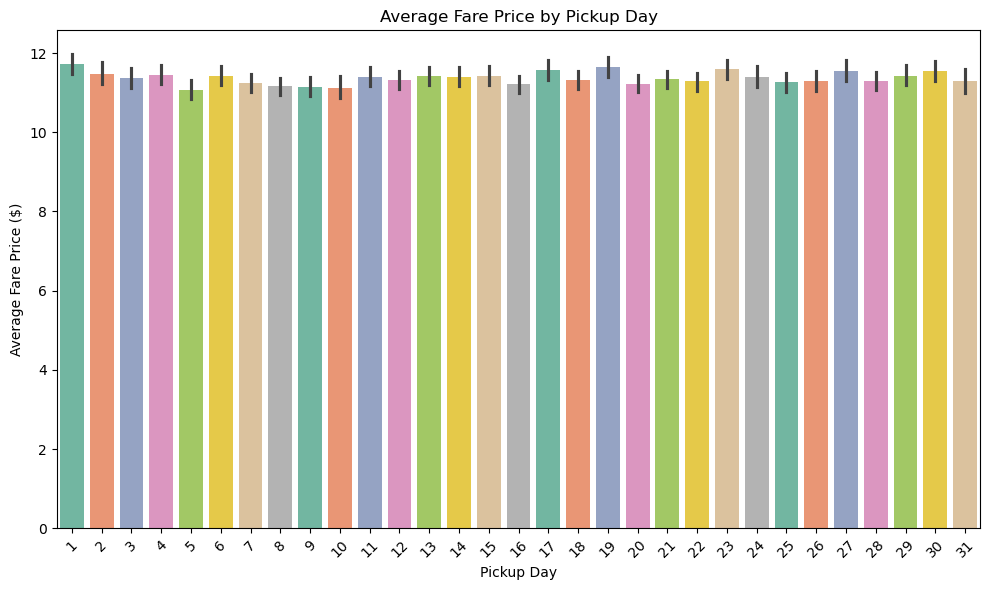

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_day', y=org_target, data=df, estimator='mean', palette='Set2')
plt.title('Average Fare Price by Pickup Day')
plt.xlabel('Pickup Day')
plt.ylabel('Average Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

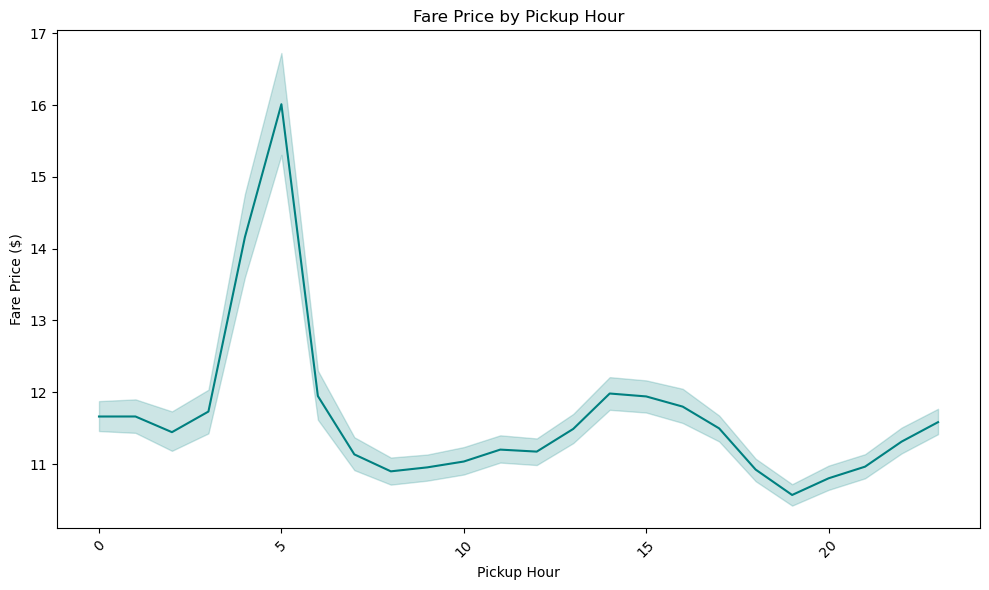

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y=org_target, data=df, color='teal')
plt.title('Fare Price by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/n3/1j5nrn9930j2yg8rlrdbgt6c0000gn/T/ipykernel_6439/998101337.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




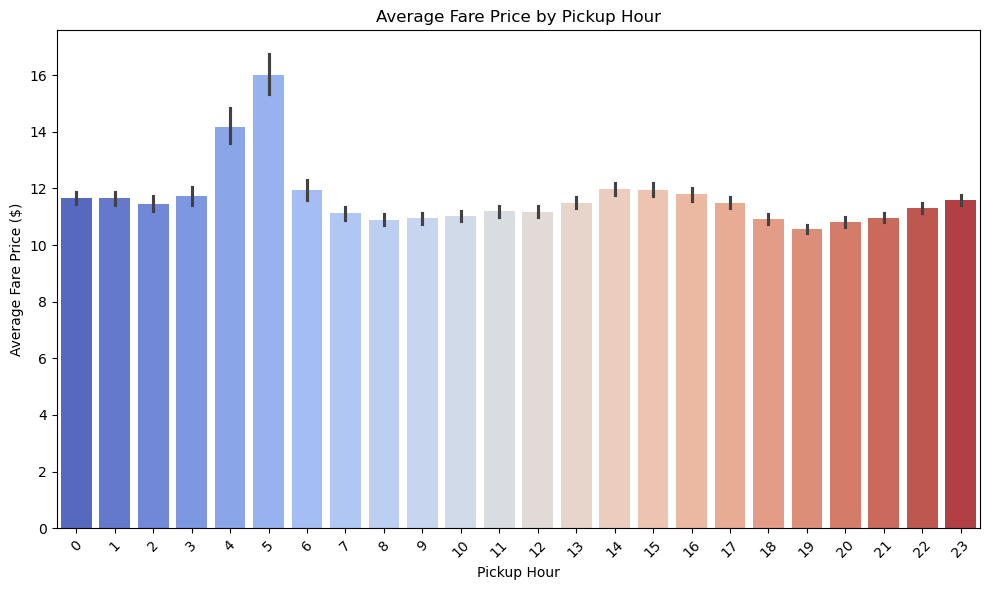

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_hour', y=org_target, data=df, estimator='mean', palette='coolwarm')
plt.title('Average Fare Price by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

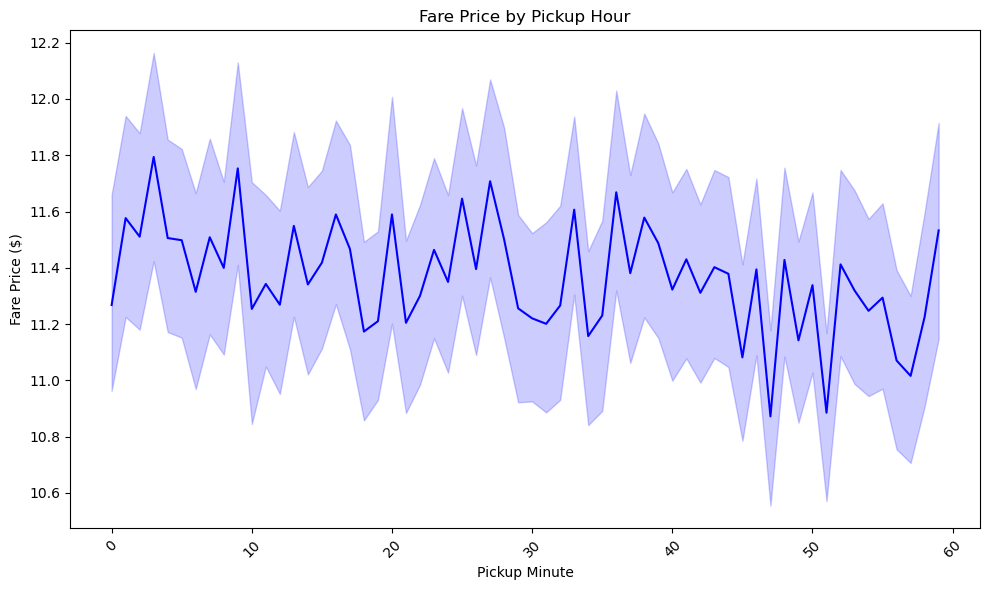

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_minute', y=org_target, data=df, color='blue')
plt.title('Fare Price by Pickup Hour')
plt.xlabel('Pickup Minute')
plt.ylabel('Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/n3/1j5nrn9930j2yg8rlrdbgt6c0000gn/T/ipykernel_6439/1348429272.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




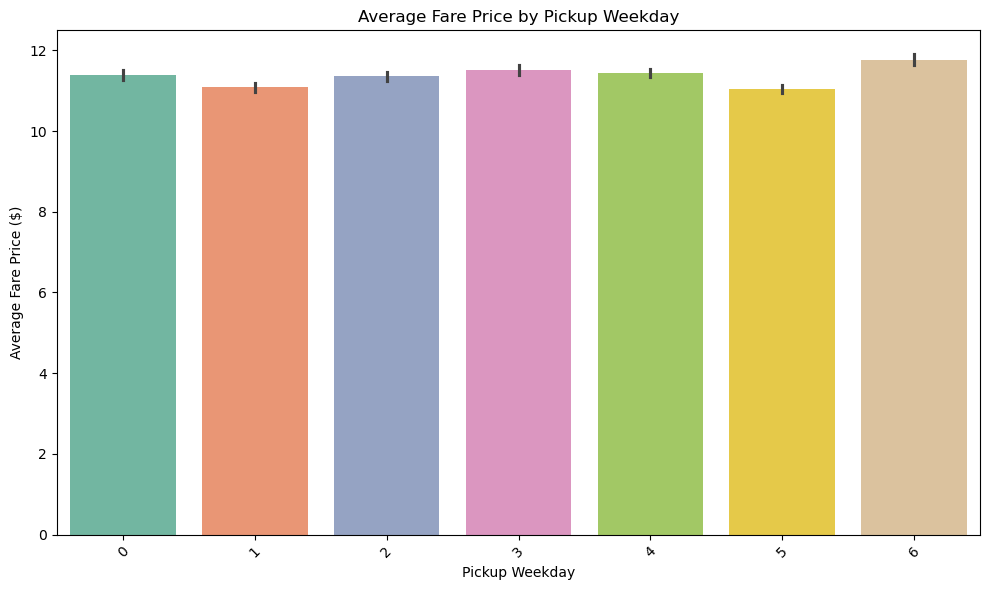

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_weekday', y=org_target, data=df, estimator='mean', palette='Set2')
plt.title('Average Fare Price by Pickup Weekday')
plt.xlabel('Pickup Weekday')
plt.ylabel('Average Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

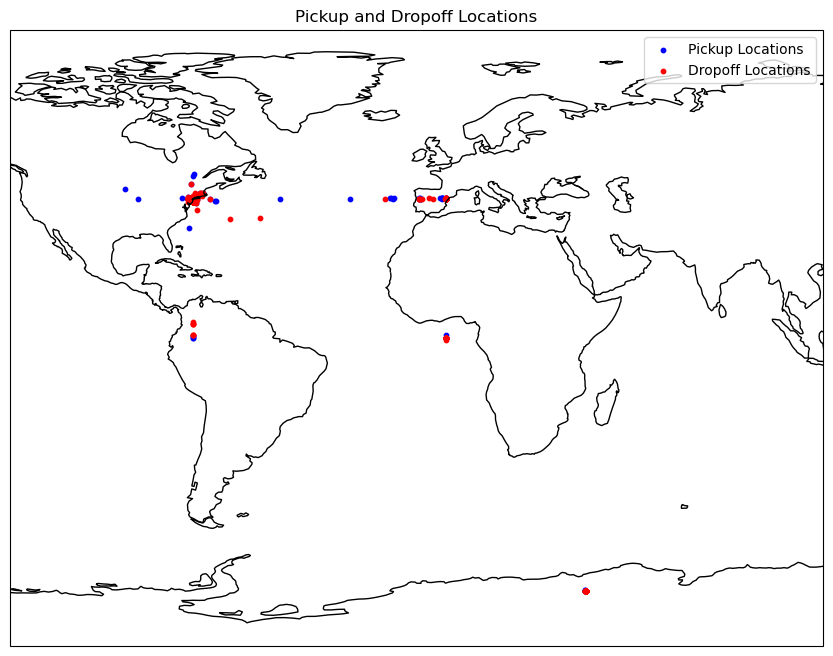

In [40]:
# Create a figure and axis with a global projection (PlateCarree is a commonly used one)
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines for context (you can remove or adjust resolution)
ax.coastlines(resolution='110m')

# Plot pickup points (Blue)
ax.scatter(df['pickup_longitude'], df['pickup_latitude'], color='blue', s=10, label='Pickup Locations', transform=ccrs.PlateCarree())

# Plot dropoff points (Red)
ax.scatter(df['dropoff_longitude'], df['dropoff_latitude'], color='red', s=10, label='Dropoff Locations', transform=ccrs.PlateCarree())

# Add title and legend
plt.title('Pickup and Dropoff Locations')
plt.legend(loc='best')

plt.show()

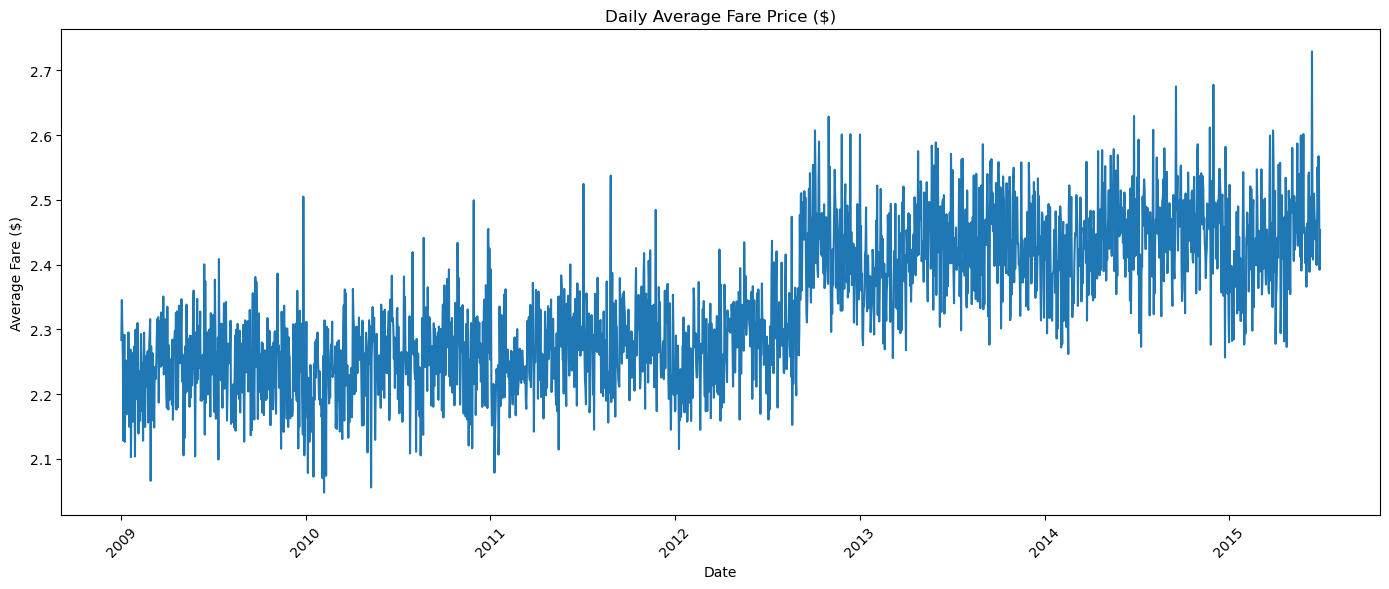

In [41]:
# Convert to datetime
df['org_pickup_datetime'] = pd.to_datetime(df['org_pickup_datetime'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna(subset=['org_pickup_datetime'])

# Group by day
daily_fares = df.groupby(df['org_pickup_datetime'].dt.date)['fare_amount'].mean()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_fares.index, y=daily_fares.values)
plt.title('Daily Average Fare Price ($)')
plt.xlabel('Date')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

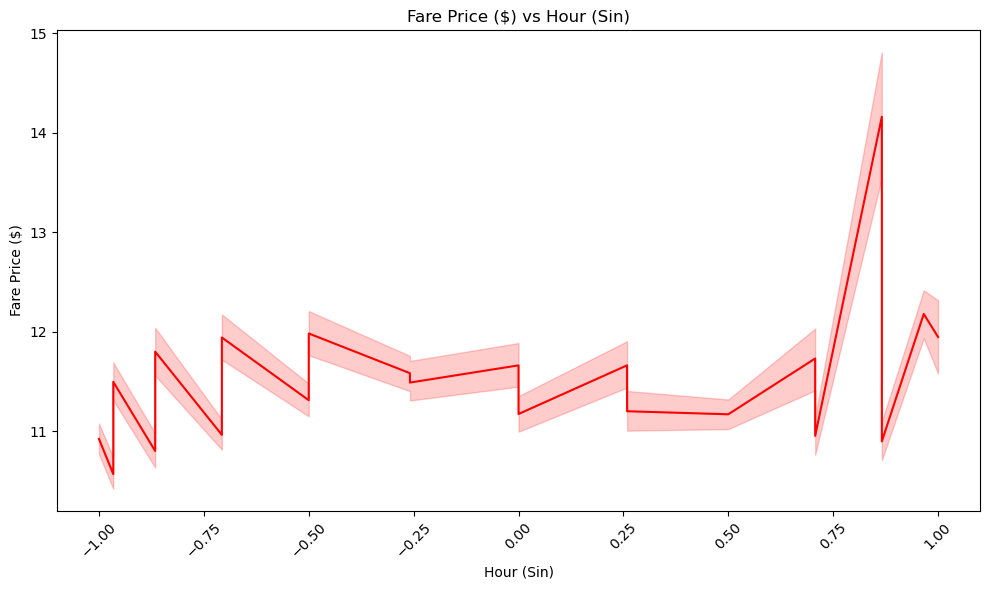

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_sin', y=org_target, data=df, color='red')
plt.title('Fare Price ($) vs Hour (Sin)')
plt.xlabel('Hour (Sin)')
plt.ylabel('Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

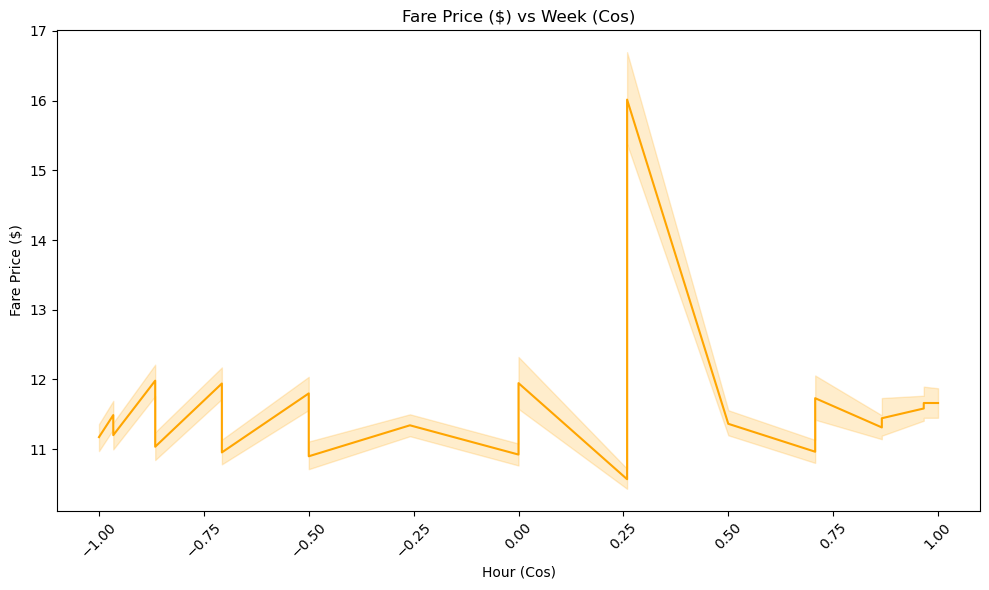

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_cos', y=org_target, data=df, color='orange')
plt.title('Fare Price ($) vs Week (Cos)')
plt.xlabel('Hour (Cos)')
plt.ylabel('Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

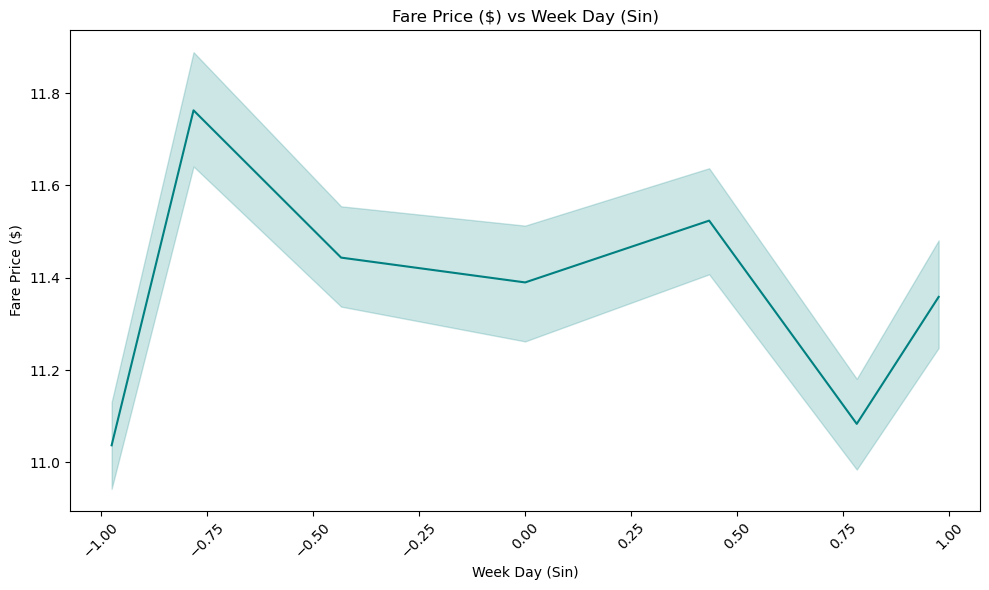

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday_sin', y=org_target, data=df, color='teal')
plt.title('Fare Price ($) vs Week Day (Sin)')
plt.xlabel('Week Day (Sin)')
plt.ylabel('Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

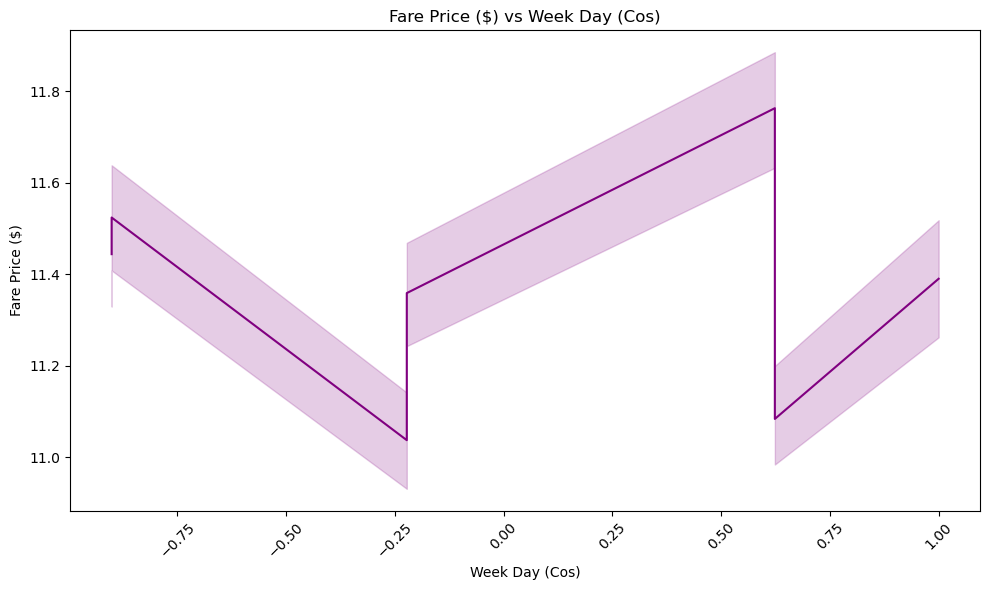

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday_cos', y=org_target, data=df, color='purple')
plt.title('Fare Price ($) vs Week Day (Cos)')
plt.xlabel('Week Day (Cos)')
plt.ylabel('Fare Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

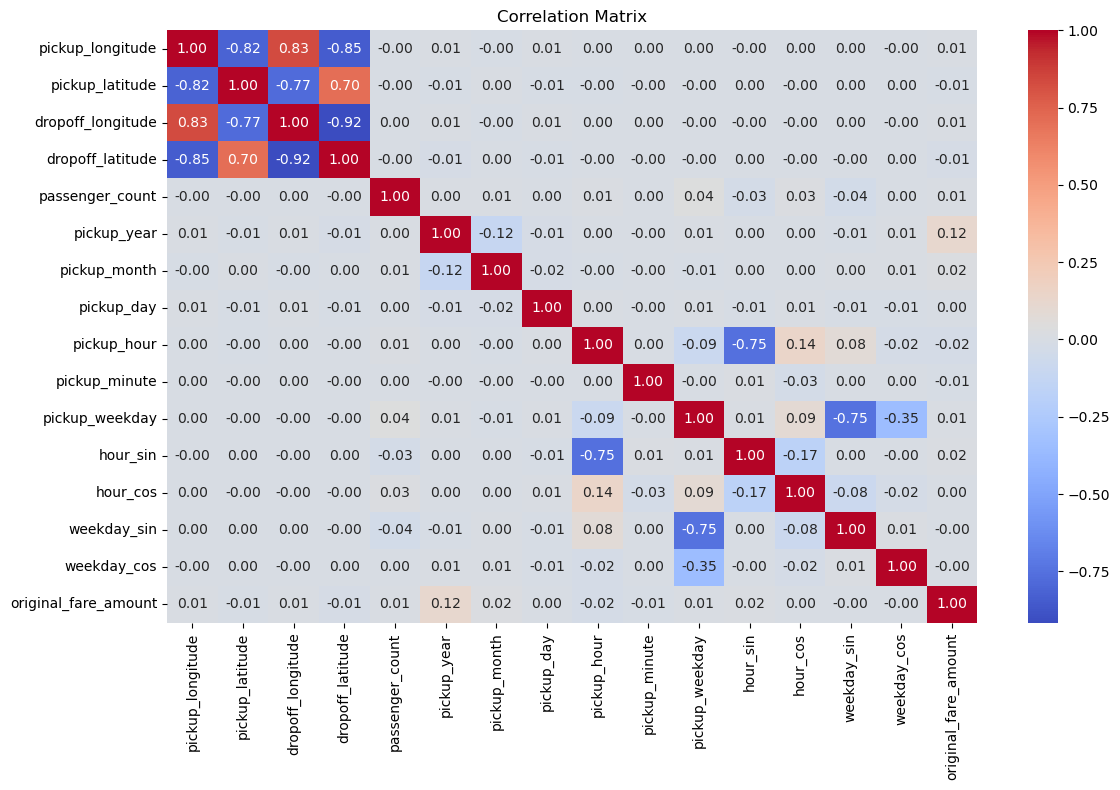

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[latitude_longitude_columns + numerical_columns +minute_year_columns  + time_freq_columns + [org_target]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### ✅ 4. Top Feature Identification Using Random Forest
- Used RandomForestRegressor to find feature importances
- Selected top features based on importance score

In [47]:
X_rf = df[latitude_longitude_columns + numerical_columns + minute_year_columns + time_freq_columns + date_time]
y_rf = df[org_target]

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.24, random_state=42
)

rfc_model = RandomForestRegressor()
rfc_model.fit(X_rf_train, y_rf_train)

feature_importances = pd.DataFrame({
    'Feature': X_rf_train.columns,
    'Importance': rfc_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

 # Display top features
top_features = feature_importances['Feature'].tolist()
print(len(top_features))
print("Top Features Selected:", top_features)

16
Top Features Selected: ['dropoff_longitude', 'pickup_longitude', 'dropoff_latitude', 'pickup_latitude', 'pickup_datetime', 'pickup_minute', 'pickup_day', 'pickup_hour', 'hour_cos', 'pickup_month', 'hour_sin', 'pickup_weekday', 'weekday_sin', 'passenger_count', 'weekday_cos', 'pickup_year']


### ✅ 5. Train-Test Split
- Split data into 77% training and 23% test sets

In [48]:
# Define features and target
X_one = df[latitude_longitude_columns + numerical_columns + minute_year_columns + time_freq_columns]
y_one = df[org_target]

# Split into train and test sets (80/20)
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(
    X_one, y_one, test_size=0.23, random_state=42
)

# Confirm the shapes
print("Train shape:", X_train_one.shape, y_train_one.shape)
print("Test shape:", X_test_one.shape, y_test_one.shape)

Train shape: (153453, 15) (153453,)
Test shape: (45837, 15) (45837,)


In [49]:
# Define features and target
X_two = df[latitude_longitude_columns + numerical_columns + date_time]
y_two = df[org_target]

# Split into train and test sets (80/20)
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(
    X_two, y_two, test_size=0.23, random_state=42
)

# Confirm the shapes
print("Train shape:", X_train_two.shape, y_train_two.shape)
print("Test shape:", X_test_two.shape, y_test_two.shape)

Train shape: (153453, 6) (153453,)
Test shape: (45837, 6) (45837,)


### ✅ 6. Feature Engineering:
- Applied MinMax scaling to the selected features to bring them within the [0, 1] range for improved model performance.

In [50]:
min_max_scaler = MinMaxScaler()

In [51]:
columns_to_scale_one = latitude_longitude_columns + numerical_columns + minute_year_columns
# Fit the scaler on the training data and transform the features
X_train_one[columns_to_scale_one] = min_max_scaler.fit_transform(X_train_one[columns_to_scale_one])
# Transform the test data using the same scaler (without fitting again)
X_test_one[columns_to_scale_one] = min_max_scaler.transform(X_test_one[columns_to_scale_one])

In [52]:
columns_to_scale_two = latitude_longitude_columns + numerical_columns + date_time
# Fit the scaler on the training data and transform the features
X_train_two[columns_to_scale_two] = min_max_scaler.fit_transform(X_train_two[columns_to_scale_two])
# Transform the test data using the same scaler (without fitting again)
X_test_two[columns_to_scale_two] = min_max_scaler.transform(X_test_two[columns_to_scale_two])

### ✅ 7. Model Building
- Trained the following regression models:
- Applied multiple regression models:
- Linear Regression, Ridge Regression, Random Forest Regressor, XGBoost Regressor, Gradient Boosting Regressor
- Compared results across models.

In [53]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
}

### ✅ 8. Model Evaluation
- Used RMSE, MAE, and R² as evaluation metrics.
- Performed hyperparameter tuning with GridSearchCV for Random Forest & XGBoost.

In [54]:
# Loop over each model to train, predict, and evaluate
for name, model in models.items():
    # Fit the model
    model.fit(X_train_one, y_train_one)  # X_train and y_train are training features and target
    
    # Predict on the test data
    y_pred_one = model.predict(X_test_one)  # X_test_one is your test feature set
    
    # Print evaluation metrics
    print(f"\n🔍 {name} Evaluation:")
    
    # R2 Score
    print("R² Score:", r2_score(y_test_one, y_pred_one))
    
    # Mean Absolute Error
    print("Mean Absolute Error:", mean_absolute_error(y_test_one, y_pred_one))
    
    # Mean Squared Error
    print("Mean Squared Error:", mean_squared_error(y_test_one, y_pred_one))
    
    # Root Mean Squared Error
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_one, y_pred_one)))
    
    # --- Additional Information for KNN or Neural Network ---
    if name == 'Neural Network (MLP)':
        # If you want to track performance on the first few test samples
        print("\n📌 Evaluation for First 5 Test Samples:")
        for i in range(5):
            print(f"Test Sample {i+1} - Predicted: {y_pred_one[i]}, Actual: {y_test_one.iloc[i]}")



🔍 Linear Regression Evaluation:
R² Score: 0.01685342786909405
Mean Absolute Error: 5.9676030464434815
Mean Squared Error: 92.93027051923654
Root Mean Squared Error: 9.640034777905967

🔍 Random Forest Evaluation:
R² Score: 0.7913179799425384
Mean Absolute Error: 2.0018701747496563
Mean Squared Error: 19.725315762844865
Root Mean Squared Error: 4.441319146700096

🔍 XGBoost Evaluation:
R² Score: 0.7388870832082842
Mean Absolute Error: 2.811436385792567
Mean Squared Error: 24.681257791427385
Root Mean Squared Error: 4.968023529677309

🔍 Lasso Regression Evaluation:
R² Score: 0.013854688932345538
Mean Absolute Error: 5.98265967072085
Mean Squared Error: 93.21372125639834
Root Mean Squared Error: 9.654725333037618

🔍 Ridge Regression Evaluation:
R² Score: 0.016820200901521698
Mean Absolute Error: 5.967706062888438
Mean Squared Error: 92.93341124227068
Root Mean Squared Error: 9.640197676514246

🔍 Neural Network (MLP) Evaluation:
R² Score: 0.02219043877066107
Mean Absolute Error: 6.071825599

In [55]:
# Loop over each model to train, predict, and evaluate
for name, model in models.items():
    # Fit the model
    model.fit(X_train_two, y_train_two)  # X_train and y_train are training features and target
    
    # Predict on the test data
    y_pred_two = model.predict(X_test_two)  # X_test_one is your test feature set
    
    # Print evaluation metrics
    print(f"\n🔍 {name} Evaluation:")
    
    # R2 Score
    print("R² Score:", r2_score(y_test_two, y_pred_two))
    
    # Mean Absolute Error
    print("Mean Absolute Error:", mean_absolute_error(y_test_two, y_pred_two))
    
    # Mean Squared Error
    print("Mean Squared Error:", mean_squared_error(y_test_two, y_pred_two))
    
    # Root Mean Squared Error
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_two, y_pred_two)))
    
    # --- Additional Information for KNN or Neural Network ---
    if name == 'Neural Network (MLP)':
        # If you want to track performance on the first few test samples
        print("\n📌 Evaluation for First 5 Test Samples:")
        for i in range(5):
            print(f"Test Sample {i+1} - Predicted: {y_pred_two[i]}, Actual: {y_test_two.iloc[i]}")



🔍 Linear Regression Evaluation:
R² Score: 0.016012323979636256
Mean Absolute Error: 5.972584449106209
Mean Squared Error: 93.00977444489503
Root Mean Squared Error: 9.644157529037724

🔍 Random Forest Evaluation:
R² Score: 0.7825669370941354
Mean Absolute Error: 2.0245391234155816
Mean Squared Error: 20.552493319355982
Root Mean Squared Error: 4.533485780208865

🔍 XGBoost Evaluation:
R² Score: 0.7419006699467814
Mean Absolute Error: 2.7538978972103045
Mean Squared Error: 24.396403590863248
Root Mean Squared Error: 4.9392715648021674

🔍 Lasso Regression Evaluation:
R² Score: 0.014410294234299736
Mean Absolute Error: 5.9798665785085605
Mean Squared Error: 93.16120360290076
Root Mean Squared Error: 9.652005159701313

🔍 Ridge Regression Evaluation:
R² Score: 0.015977724079077493
Mean Absolute Error: 5.972692246458363
Mean Squared Error: 93.01304494210268
Root Mean Squared Error: 9.644327086018116

🔍 Neural Network (MLP) Evaluation:
R² Score: 0.016627157327134268
Mean Absolute Error: 6.0769

### ✅ 9. Hyperparameter Tuning (Validation Step)
- Used GridSearchCV to tune the Random Forest:
- Best Parameters:
  - {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
  - {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

In [58]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest Regressor
rfr_model = RandomForestRegressor(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit on training data only
grid_search.fit(X_train_one, y_train_one)

# Best model
best_rf = grid_search.best_estimator_

# Print best parameters
print("🔧 Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)

# Predict on the test set
rf_tuned_preds = best_rf.predict(X_test_one)

# Evaluate the model performance
print("🔍 Tuned Random Forest Evaluation:")
print("R² Score:       ", r2_score(y_test_one, rf_tuned_preds))
print("MAE:            ", mean_absolute_error(y_test_one, rf_tuned_preds))
print("RMSE:           ", np.sqrt(mean_squared_error(y_test_one, rf_tuned_preds)))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
🔧 Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
🔍 Tuned Random Forest Evaluation:
R² Score:        0.7965789446717181
MAE:             1.9561124521900275
RMSE:            4.384977987459955


In [59]:
# Define the parameter grid for Gradient Boosting Regressor
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Grid search with 5-fold cross-validation
grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr,
                               cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit on training data
grid_search_gbr.fit(X_train_one, y_train_one)

# Best model
best_gbr = grid_search_gbr.best_estimator_

# Print best parameters
print("🔧 Best Hyperparameters for Gradient Boosting:")
print(grid_search_gbr.best_params_)

# Predict on the test set
gbr_tuned_preds = best_gbr.predict(X_test_one)

# Evaluate the model performance
print("🔍 Tuned Gradient Boosting Evaluation:")
print("R² Score:       ", r2_score(y_test_one, gbr_tuned_preds))
print("MAE:            ", mean_absolute_error(y_test_one, gbr_tuned_preds))
print("RMSE:           ", np.sqrt(mean_squared_error(y_test_one, gbr_tuned_preds)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
🔧 Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
🔍 Tuned Gradient Boosting Evaluation:
R² Score:        0.78717110446263
MAE:             2.0297291337331322
RMSE:            4.4852304477129605


## 📊 Results, Observations & Conclusion:
- Linear models (Linear & Ridge Regression) underperformed, indicating the problem is non-linear in nature.
- Random Forest XGBoost and Gradient Boosting provided significantly better predictions by capturing non-linear relationships.
- Feature importance analysis showed trip distance and time-based features were the most influential in fare prediction.
- This project demonstrates how regression + feature engineering can help estimate real-world costs.